# Отток Студентов

**Кратко о задаче:**
- *Необходимо построить модель оттока студентов*
- *Предлагаю свести это к задаче бинарной классификации, где 1 - студент будет отчислен, а 0 - студент не будет отчислен*
- *Данные не размечены, поэтому необходимо проанализировать и понять, в какой момент студент является отчисленым. А затем разметить по выявленным закономерностям*

# Imports

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.set_style("whitegrid")

# Loading Data

In [152]:
df = pd.read_excel("data.xlsx")

In [153]:
df.head()

,hash,Номер ЛД,Уровень подготовки,Учебная группа,Специальность/направление,Учебный год,Полугодие,Дисциплина,Оценка (без пересдач),Оценка (успеваемость)
0,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,Инженерная компьютерная графика,Хорошо,Хорошо
1,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,Иностранный язык,Удовлетворительно,Удовлетворительно
2,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,История,зачтено,зачтено
3,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,Математика,Хорошо,Хорошо
4,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,Программирование и алгоритмизация,Хорошо,Хорошо


In [154]:
df = df.rename(columns={"Номер ЛД": "id",
                        "Уровень подготовки": "level",
                        "Учебная группа": "group",
                        "Специальность/направление": "speciality",
                        "Учебный год": "year", 
                        "Полугодие": "semester",
                        "Дисциплина": "subject",
                        "Оценка (без пересдач)": "grade",
                        "Оценка (успеваемость)": "perfomance"})
df.head(2)

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
0,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,Инженерная компьютерная графика,Хорошо,Хорошо
1,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,Иностранный язык,Удовлетворительно,Удовлетворительно


# EDA

Посмотрим пропуски в данных

In [182]:
print("Количество пропусков в данных по колонкам (проценты):")
round(df.isnull().sum() / len(df) * 100, 1).astype("str") + " %"

Количество пропусков в данных по колонкам (проценты):


hash           0.0 %
id             0.0 %
level          0.0 %
group          0.0 %
speciality     0.0 %
year           0.0 %
semester       0.0 %
subject        0.0 %
grade         49.7 %
perfomance    47.7 %
dtype: object

Колонки `grade` и `perfomance` имею почти по 50% пропущенных данных. Позже разберемся в чем дело

Взглянем на описательные статистики

In [183]:
df.describe(include="object")

,hash,level,group,speciality,year,semester,subject,grade,perfomance
count,376007,376007,376007,376007,376007,376007,376007,189004,196522
unique,9085,4,489,27,11,2,2096,9,9
top,002ed2297ad196e3b8a7e668f32d125b,Академический бакалавр,БЛГ-20-8,Лингвистика,2023 - 2024,II полугодие,Иностранный язык,Отлично,Отлично
freq,218,203074,3167,75400,158114,195820,30031,54506,57863


In [184]:
print(f"Количество студентов: \t {df.id.nunique()}")
print(f"Количество студентов: \t {df.group.nunique()}")

Количество студентов: 	 9098
Количество студентов: 	 489


In [185]:
df.grade.unique()

array(['Хорошо', 'Удовлетворительно', 'зачтено', nan, 'Отлично',
       'Неудовлетворительно', 'Неявка', 'не зачтено',
       'Неявка по ув.причине', 'Не допущен'], dtype=object)

In [186]:
df.perfomance.unique()

array(['Хорошо', 'Удовлетворительно', 'зачтено', 'Отлично', nan,
       'Неудовлетворительно', 'Неявка', 'не зачтено',
       'Неявка по ув.причине', 'Не допущен'], dtype=object)

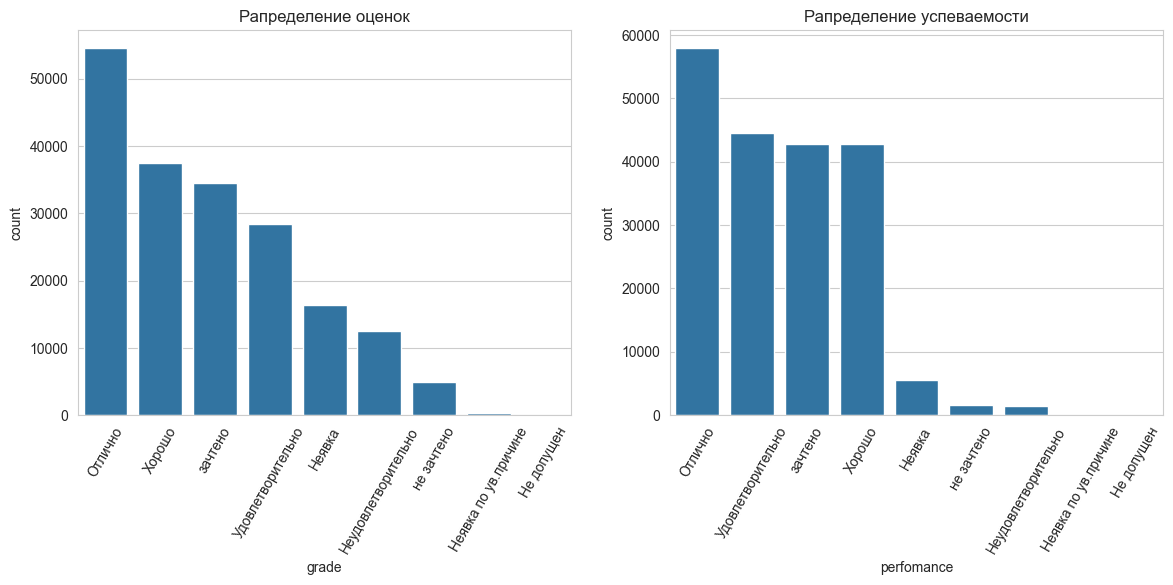

In [187]:
fig = plt.figure(figsize=(14, 5))

ax_1 = plt.subplot(1, 2, 1)

sns.barplot(df.grade.value_counts())

plt.title("Рапределение оценок")
plt.xticks(rotation=60)

ax_2 = plt.subplot(1, 2, 2)

sns.barplot(df.perfomance.value_counts())

plt.title("Рапределение успеваемости")
plt.xticks(rotation=60)

plt.show()

In [160]:
df.perfomance.value_counts()

perfomance
Отлично                 57863
Удовлетворительно       44577
зачтено                 42812
Хорошо                  42761
Неявка                   5504
не зачтено               1576
Неудовлетворительно      1419
Неявка по ув.причине        9
Не допущен                  1
Name: count, dtype: int64

У меня не было изначальной расшифровки колонок и условий, при которых студент считается отчисленым. Поэтому я буду считать, что: <br>
- `Оценка (без пересдач)` (grade) - оценка за экзамен
- `Оценка (успеваемость)` (perfomance) - итоговая оценка за предмет с учетом первой и второй пересдачи
- В `grade` спокойно может быть любая оценка, но вот, если в `perfomance` неуд, не зачтено или неявка, то студент считается отчисленным **P.S. В EDA -> Target поменял критерий**
- Небольшая ремарка по предыдущему пункту: последняя пересдача, как правило, примерно через год, соответсвенно, если в 2022 году, например, что-то не сдал, то он дальше может продолжить получать оценки по другим предметам, но как только он не сдает последнюю пересдачу (`perfomance`), студента отчисляют и дальше идут NaN

In [444]:
dismissed = df[df.perfomance.isin(["Неудовлетворительно", "не зачтено", "Неявка"])].id.nunique()
print(f'Получается, что каждый {round(df.id.nunique() / dismissed)}-ий студент отчислен')

Получается, что каждый 3-ий студент отчислен


Например, из группы в 24 человека, в конечном итоге будет отчислено приблизительно 8 человек - что в целом звучит примерно нормально, но возможно все же многовато

Возможно критерий отчисления не должна входить "Неявка", но кажется, что, если человек не появился на последней пересдаче, то он не сдал экзамен и соответсвенно отчислен.

*Этот момент требует уточнения.*

Также можем заметить, что факта неявки на пересдачи по предметам в 1.8 раз больше, чем незачетов + неудов. Вероятно, некоторые студенты в какой-то момент просто перестают появляться в вузе и на экзаменах - забрасывают универ

## Year

Поработаем с колонкой `year`

In [256]:
df.year.value_counts()

year
2023 - 2024    157298
2022 - 2023    113950
2021 - 2022     67558
2020 - 2021     28226
2019 - 2020      5520
2018 - 2019      2299
2024 - 2025       217
2025 - 2026        35
2017 - 2018        15
2026 - 2027         5
2027 - 2028         1
Name: count, dtype: int64

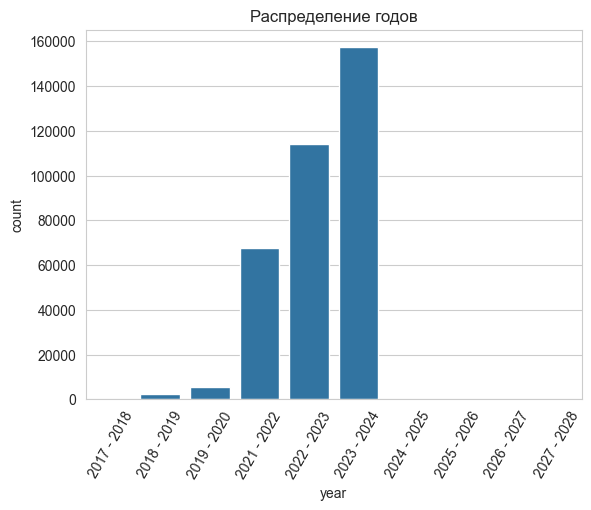

In [257]:
sns.barplot(df.year.value_counts(), order=["2017 - 2018", "2018 - 2019", "2019 - 2020", "2021 - 2022", "2022 - 2023", 
                                           "2023 - 2024", "2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])

plt.title("Распределение годов")
plt.xticks(rotation=60)

plt.show()

Странно, что есть какие-то данные за период 2024 - 2028. Посмотрим в ручную на эти записи

Сначала взглянем на период 2023 - 2024 второе полугодие, потому что оценок за этот период еще никаких не должно быть

In [205]:
print("Количество записей: " + str(df[(df.year == "2023 - 2024") & (df.semester == "II полугодие")].shape[0]))

df[(df.year == "2023 - 2024") & (df.semester == "II полугодие")].head()

Количество записей: 77317


,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
59,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,II полугодие,Аппаратные средства хранения и обработки данных,NaN,NaN
60,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,II полугодие,Информационная безопасность и кодирование,NaN,NaN
61,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,II полугодие,Информационно-управляющие системы,NaN,NaN
62,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,II полугодие,Курсовая научно-исследовательская работа,NaN,NaN
63,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,II полугодие,Методы параллельной обработки данных,NaN,NaN


Посмотрим на количество пропусков в `grade` и `perfomance`

In [203]:
df[(df.year == "2023 - 2024") & (df.semester == "II полугодие")][["grade", "perfomance"]].isna().sum()

grade         76501
perfomance    76470
dtype: int64

Можем заметить, что в 99% случаях за 2023 - 2024 год второй семестр данные об оценках пропущены, что кажется логичным, ведь этот семестр только начался.

Сразу удалим данные, где `perfomance` и `grade` пропущены за семестр, который только начался

In [324]:
df = df[~((df.grade.isna())& (df.perfomance.isna()) & (df.year == "2023 - 2024") & (df.semester == "II полугодие"))]

Посмотрим на ненулевые записи в колонке `grade`

In [212]:
df[~(df.grade.isna()) & (df.year == "2023 - 2024") & (df.semester == "II полугодие")]

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
4092,f185715600a8147a4f5ab689320f432b,1909744,Академический бакалавр,БЭК-19-3з,Экономика,2023 - 2024,II полугодие,Анализ финансовой отчетности,зачтено,зачтено
4093,f185715600a8147a4f5ab689320f432b,1909744,Академический бакалавр,БЭК-19-3з,Экономика,2023 - 2024,II полугодие,Бюджет предприятия,Удовлетворительно,Удовлетворительно
4095,f185715600a8147a4f5ab689320f432b,1909744,Академический бакалавр,БЭК-19-3з,Экономика,2023 - 2024,II полугодие,Ключевые экономические показатели бизнеса,Удовлетворительно,Удовлетворительно
4096,f185715600a8147a4f5ab689320f432b,1909744,Академический бакалавр,БЭК-19-3з,Экономика,2023 - 2024,II полугодие,Налоги и налогообложение,Неудовлетворительно,Неудовлетворительно
4100,f185715600a8147a4f5ab689320f432b,1909744,Академический бакалавр,БЭК-19-3з,Экономика,2023 - 2024,II полугодие,Управление проектами,зачтено,зачтено
...,...,...,...,...,...,...,...,...,...,...
373383,8e3c7b5807d8efdc9b1f000dce40fcad,2112004,Специалист,СГД-21-6з,Горное дело,2023 - 2024,II полугодие,Геология,Неявка,Неявка
373384,8e3c7b5807d8efdc9b1f000dce40fcad,2112004,Специалист,СГД-21-6з,Горное дело,2023 - 2024,II полугодие,Горнопромышленная экология,Неявка,Неявка
373389,8e3c7b5807d8efdc9b1f000dce40fcad,2112004,Специалист,СГД-21-6з,Горное дело,2023 - 2024,II полугодие,Прикладная механика,не зачтено,не зачтено
373392,8e3c7b5807d8efdc9b1f000dce40fcad,2112004,Специалист,СГД-21-6з,Горное дело,2023 - 2024,II полугодие,Физика горных пород,Неявка,Неявка


Мне сложно объяснить природу этих данных. Возможно это какая-то досрочная сдача или что-то другое.

Пока что я удалю эти записи из данных.

In [214]:
df = df[~(~(df.grade.isna()) & (df.year == "2023 - 2024") & (df.semester == "II полугодие"))]

In [239]:
df[(~df.grade.isna()) & (df.perfomance.isna()) & (df.year == "2023 - 2024") & (df.semester == "II полугодие")]

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance


Объектов, чтобы не был пропущен `grade`, но был пропущен `perfomance` за этот период нет

Взглянем теперь на ненулевые записи в колонке `perfomance` за 2023 - 2024 год второй семестр

In [240]:
print(f'Количество строчек:                 {df[~(df.perfomance.isna()) & (df.year == "2023 - 2024") & (df.semester == "II полугодие")].shape[0]}')
print(f'Количество строчек с нулевым grade: {df[~(df.perfomance.isna()) & (df.year == "2023 - 2024") & (df.semester == "II полугодие")].grade.isna().sum()}')
print(f'Уникальные значения в perfomance:   {df[~(df.perfomance.isna()) & (df.year == "2023 - 2024") & (df.semester == "II полугодие")].perfomance.unique()}')

df[~(df.perfomance.isna()) & (df.year == "2023 - 2024") & (df.semester == "II полугодие")].head()

Количество строчек:                 371
Количество строчек с нулевым grade: 371
Уникальные значения в perfomance:   ['Хорошо' 'Удовлетворительно' 'Отлично' 'зачтено']


,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
1400,64a9281296895f40b84a42cd7d6a16d2,2214073,Специалист,СГД-19-1,Горное дело,2023 - 2024,II полугодие,Экономика и менеджмент горного производства,NaN,Хорошо
1524,4c59d0a09c826a3391721dc49555e2c1,2110542,Академический бакалавр,БПМ-21-2,Прикладная математика,2023 - 2024,II полугодие,Иностранный язык,NaN,Удовлетворительно
3195,e3deb7b8f8d0b49cc2f56cb17de2cb8c,2315545,Бакалавр,БИВТ-23-7,"Информатика и вычислительная техника (ИВТ, ИСТ...",2023 - 2024,II полугодие,Компьютерная и инженерная графика,NaN,Отлично
3196,e3deb7b8f8d0b49cc2f56cb17de2cb8c,2315545,Бакалавр,БИВТ-23-7,"Информатика и вычислительная техника (ИВТ, ИСТ...",2023 - 2024,II полугодие,Математика,NaN,Хорошо
3199,e3deb7b8f8d0b49cc2f56cb17de2cb8c,2315545,Бакалавр,БИВТ-23-7,"Информатика и вычислительная техника (ИВТ, ИСТ...",2023 - 2024,II полугодие,Персональная эффективность,NaN,зачтено


Вероятно, ситуации, когда в только начавшемся семестре у каких-то студентов уже есть оценки за предмет объясняются тем, что *студенты перевелись из другого университета и у них уже была успеваемость по этому предмету*

Можно заметить, что в таком случае успеваемость только положительная.

Есть гипотеза, что лучше все же удалить эти строчки перед обучением модели, но пока что пусть будут

Рассмотрим случаи, когда `year` 2024-2028

In [241]:
print(f'Количество строчек:                      {df[df.year.isin(["2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])].shape[0]}')
print(f'Количество строчек с нулевым grade:      {df[df.year.isin(["2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])].grade.isna().sum()}')
print(f'Количество строчек с нулевым perfomance: {df[df.year.isin(["2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])].perfomance.isna().sum()}')
print(f'Уникальные значения в perfomance:        {df[df.year.isin(["2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])].perfomance.unique()}')

df[df.year.isin(["2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])].head()

Количество строчек:                      325
Количество строчек с нулевым grade:      227
Количество строчек с нулевым perfomance: 67
Уникальные значения в perfomance:        ['зачтено' 'Удовлетворительно' 'Хорошо' 'Отлично' nan]


,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
3202,e3deb7b8f8d0b49cc2f56cb17de2cb8c,2315545,Бакалавр,БИВТ-23-7,"Информатика и вычислительная техника (ИВТ, ИСТ...",2024 - 2025,I полугодие,Философия,NaN,зачтено
3203,e3deb7b8f8d0b49cc2f56cb17de2cb8c,2315545,Бакалавр,БИВТ-23-7,"Информатика и вычислительная техника (ИВТ, ИСТ...",2024 - 2025,II полугодие,Безопасность жизнедеятельности,NaN,зачтено
3204,e3deb7b8f8d0b49cc2f56cb17de2cb8c,2315545,Бакалавр,БИВТ-23-7,"Информатика и вычислительная техника (ИВТ, ИСТ...",2024 - 2025,II полугодие,Цифровая экономика и процессное управление пре...,NaN,зачтено
3945,95e9475faa445fbac38fb41ea9611e9b,2105839,Академический бакалавр,БИВТ-21-16,Информатика и вычислительная техника,2024 - 2025,II полугодие,Философия,NaN,зачтено
4463,f32399a8744fa5bb51b8f75eb5a29f4a,2112213,Специалист,СГД-21-6з,Горное дело,2024 - 2025,II полугодие,Иностранный язык,NaN,Удовлетворительно


Можем заметить, что в 2024 - 2028 годах некоторые студенты так же имеют уже успеваемость по некоторым предметам и скорее всего это так же связано с переводом из другого вуза

In [247]:
df[(df.year.isin(["2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])) & (df.perfomance.isna())].head(2)

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
6155,f4e26c2bb9bdbbb9240818909d6293e8,1900386,Специалист,СГД-22-1,Горное дело,2024 - 2025,I полугодие,Метрология и стандартизация,не зачтено,NaN
6156,f4e26c2bb9bdbbb9240818909d6293e8,1900386,Специалист,СГД-22-1,Горное дело,2024 - 2025,I полугодие,Физика горных пород,Неявка,NaN


Есть ситуация, когда есть оценка за экзамен - `grade` но нет оценки итоговой - `perfomance`. Удалим такие случаи

In [249]:
df = df[~((df.year.isin(["2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])) & (df.perfomance.isna()))]

In [258]:
df[df.year.isin(["2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])].isna().sum()

hash            0
id              0
level           0
group           0
speciality      0
year            0
semester        0
subject         0
grade         227
perfomance      0
dtype: int64

In [262]:
df[df.perfomance.isna()].year.unique()

array(['2021 - 2022', '2023 - 2024', '2022 - 2023', '2020 - 2021',
       '2019 - 2020', '2018 - 2019', '2017 - 2018'], dtype=object)

In [292]:
print("Количество строчек: " + str(df[(df.perfomance.isna()) & (~df.year.isin(["2023 - 2024", "2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"]))].shape[0]))

df[(df.perfomance.isna()) & (~df.year.isin(["2023 - 2024", "2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"]))].head()

Количество строчек: 36728


,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
32,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2021 - 2022,II полугодие,Учебная практика,Неявка,NaN
239,d0e1ce9d5a808b346af5d278ddd6b616,2206374,Бакалавр,БМН-22-1,Менеджмент,2022 - 2023,II полугодие,Математика,Неудовлетворительно,NaN
515,7c59617378b8960a1a5d5de60b86a520,2001343,Академический бакалавр,БНМТ-21-1,Нанотехнологии и микросистемная техника,2022 - 2023,II полугодие,Методы математической физики,Неявка,NaN
516,7c59617378b8960a1a5d5de60b86a520,2001343,Академический бакалавр,БНМТ-21-1,Нанотехнологии и микросистемная техника,2022 - 2023,II полугодие,Основы квантовой механики и теория упругости,Неявка,NaN
518,7c59617378b8960a1a5d5de60b86a520,2001343,Академический бакалавр,БНМТ-21-1,Нанотехнологии и микросистемная техника,2022 - 2023,II полугодие,Учебная практика,NaN,NaN


In [317]:
df[(df.perfomance.isna()) & (~df.year.isin(["2023 - 2024", "2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"]))].head(2)

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
32,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2021 - 2022,II полугодие,Учебная практика,Неявка,NaN
239,d0e1ce9d5a808b346af5d278ddd6b616,2206374,Бакалавр,БМН-22-1,Менеджмент,2022 - 2023,II полугодие,Математика,Неудовлетворительно,NaN


Как я уже раньше упоминал, когда студент в `perfomance` получает фэйл, то дальше у него идут NaN. Поэтому данные пропущенны

Либо же это какие-то ошибки в данных

Удалим эти значения

In [320]:
df = df[~((df.perfomance.isna()) & (~df.year.isin(["2023 - 2024", "2024 - 2025", "2025 - 2026", "2026 - 2027", "2027 - 2028"])))]

In [333]:
df.perfomance.isna().sum()

66220

Но у нас все еще остались пропуски в данных в колонке с оценками

Посмотрим в какой временной промежуток это происходит:

In [334]:
print(df[df.perfomance.isna()].year.unique())
print(df[df.perfomance.isna()].semester.unique())

['2023 - 2024']
['I полугодие']


In [341]:
df[~(df.perfomance.isna()) & (df.year == "2023 - 2024")].head(3)

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
58,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,I полугодие,Системы управления производством,зачтено,зачтено
68,953270dae24692e16c36eb91b1f2be7f,2311813,Бакалавр,БИВТ-23-9,"Информатика и вычислительная техника (ИВТ, ИСТ...",2023 - 2024,I полугодие,Введение в специальность,зачтено,зачтено
84,caad24c3877784fcfc2a76de142333aa,2305400,Магистр,МПИ-23-1-1,Прикладная информатика,2023 - 2024,I полугодие,Введение в искусственные нейронные сети,Отлично,Отлично


In [342]:
df[(df.perfomance.isna()) & (df.year == "2023 - 2024")].head(3)

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance
51,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,I полугодие,CASE-технологии в управлении коллективом разра...,NaN,NaN
52,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,I полугодие,Иностранный язык,NaN,NaN
53,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2023 - 2024,I полугодие,Интеллектуальный анализ данных,NaN,NaN


Есть гипотеза, что на момент, когда были выгружены данные, информация за 1 семестр 2023-2024 года по некоторым предметам еще не была получена

Например можем видеть студента с `id` = 2010218: по какому-то предмету у него уже стоит зачет, а по каким-то другим не стоит оценка

Удалим данные, где пропущен `perfomance`

In [345]:
df = df[~df.perfomance.isna()]

In [346]:
df.isna().sum()

hash              0
id                0
level             0
group             0
speciality        0
year              0
semester          0
subject           0
grade         15086
perfomance        0
dtype: int64

Таким образом, мы избавились от пропусков в `perfomance`. 

В `grade` же остались еще пропущенные значения, они возникают у переводников, у которых уже есть оценка по предмету в другом университете, и она просто переносится в `perfomance`, а никакой экзамен или зачем они не сдают.

## Target

Создадим колонку с таргетом

In [356]:
df.perfomance.apply(lambda x: 1 if x in ["Неудовлетворительно", "Неявка", "не зачтено"] else 0)

0         0
1         0
2         0
3         0
4         0
         ..
375975    0
375976    0
375979    0
375993    0
375997    0
Name: perfomance, Length: 196046, dtype: int64

In [401]:
df.loc[:, "dismissed"] = df.perfomance.apply(lambda x: 1 if x in ["Неудовлетворительно", "Неявка", "не зачтено"] else 0)
# df.loc[:, "dismissed"] = df.perfomance.apply(lambda x: 1 if x in ["Неудовлетворительно", "Неявка"] else 0)

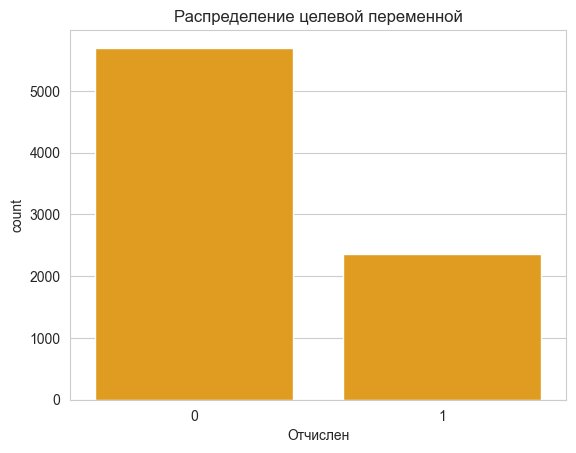

In [402]:
sns.barplot((df.groupby("id").dismissed.sum() >= 1).astype("int").value_counts(), color="orange")

plt.title("Распределение целевой переменной")
plt.xlabel("Отчислен")

plt.show()

Посчитаем группы, в которых чаще всего отчисляют

In [432]:
df[df.dismissed == 1].groupby(["group", "dismissed"]).id.nunique().sort_values(ascending=False)

group        dismissed
МИСТ-23-3-2  1            24
МИСТ-23-3-3  1            23
СГД-20-1     1            23
БИВТ-21-1    1            21
БНМТ-21-1    1            20
                          ..
БЭК-23-4     1             1
БЭК-23-5     1             1
БЭК-23-6     1             1
БИВТ-23-16   1             1
МЛГ-23-3     1             1
Name: id, Length: 331, dtype: int64

Рассмотрим группу **"МИСТ-23-3-2"**

Посчитаем количество учеников в группе

In [435]:
df[df.group == "МИСТ-23-3-2"].id.nunique()

26

Получается, что отчислили 24/26 студентов, что звучит очень нереалистично

In [436]:
df[df.group == "МИСТ-23-3-2"].head()

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance,dismissed
110267,b4daa46b300db35adf06510ce942b237,2311329,Магистр,МИСТ-23-3-2,Информационные системы и технологии,2023 - 2024,I полугодие,Frontend разработка,не зачтено,не зачтено,1
110272,b4daa46b300db35adf06510ce942b237,2311329,Магистр,МИСТ-23-3-2,Информационные системы и технологии,2023 - 2024,I полугодие,Основы теории и методологии дизайна,Отлично,Отлично,0
113327,717d0d254e1d7c908edcd8f336b2288b,2304449,Магистр,МИСТ-23-3-2,Информационные системы и технологии,2023 - 2024,I полугодие,Frontend разработка,не зачтено,не зачтено,1
113332,717d0d254e1d7c908edcd8f336b2288b,2304449,Магистр,МИСТ-23-3-2,Информационные системы и технологии,2023 - 2024,I полугодие,Основы теории и методологии дизайна,Неявка,Неявка,1
121061,434e61b82ddbc339bb4cb53f9d35bbc8,2313734,Магистр,МИСТ-23-3-2,Информационные системы и технологии,2023 - 2024,I полугодие,Frontend разработка,не зачтено,не зачтено,1


Можно заметить, что присутствуют не зачеты в `perfomance` у большого количества человек. Трудно понять с чем это связано.

**Думаю, что лучше пока что использовать критерий, что если в `perfomance` = "Неудовлетворительно" => студент отчислен**

In [437]:
df.loc[:, "dismissed"] = df.perfomance.apply(lambda x: 1 if x == "Неудовлетворительно" else 0)

In [438]:
df[df.dismissed == 1].groupby(["group", "dismissed"]).id.nunique().sort_values(ascending=False)

group      dismissed
СГД-20-1   1            16
БПИ-21-3   1            15
БМН-20-3   1            15
БПИ-20-2   1            13
БПИ-20-1   1            13
                        ..
БЛГ-20-6   1             1
БЛГ-20-16  1             1
МПИ-22-3   1             1
БЛГ-22-1   1             1
БПИ-22-7   1             1
Name: id, Length: 202, dtype: int64

In [439]:
df[df.group == "СГД-20-1"].id.nunique()

31

Теперь ситуация получше. Самое большое - 16/31 студентов было отчислено к 4-ому курсу 

Посмотрим распределение таргета

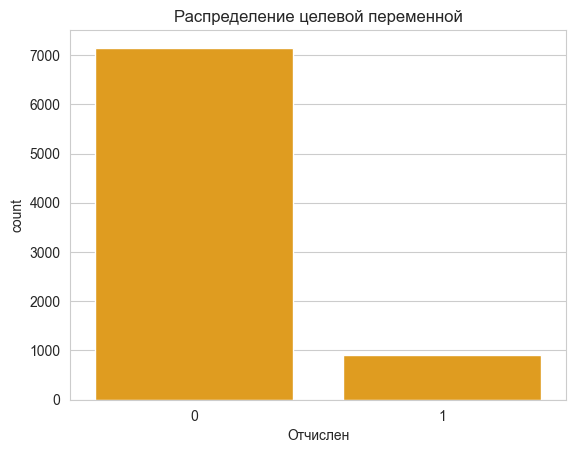

In [440]:
sns.barplot((df.groupby("id").dismissed.sum() >= 1).astype("int").value_counts(), color="orange")

plt.title("Распределение целевой переменной")
plt.xlabel("Отчислен")

plt.show()

In [447]:
dismissed = df[df.dismissed == 1].id.nunique()
students = df[df.dismissed == 0].id.nunique()

print(f'Получается, что каждый {round(students / dismissed)}-ий студент отчислен')

Получается, что каждый 9-ий студент отчислен


Преобразуем колонки с оценками в числовые значения

In [449]:
grades_mapping = {
    'зачтено': 6,
    'Отлично': 5,
    'Хорошо': 4,
    'Удовлетворительно': 3,
    'Неудовлетворительно': 2,
    'не зачтено': 0,
    'Неявка': -1,
    'Не допущен': -2,
    'Неявка по ув.причине': -3,
}

df["grade"] = df.grade.map(grades_mapping)
df["perfomance"] = df.perfomance.map(grades_mapping)

In [450]:
df.head(2)

,hash,id,level,group,speciality,year,semester,subject,grade,perfomance,dismissed
0,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,Инженерная компьютерная графика,4.0,4,0
1,67a80fffd8d0294a596eda117d7e393c,2010218,Академический бакалавр,БИВТ-20-4,Информатика и вычислительная техника,2020 - 2021,I полугодие,Иностранный язык,3.0,3,0


## Group

In [491]:
groupped_by_group = df[df.dismissed == 1].groupby("group", as_index=False) \
    .agg({"id": "nunique"}) \
    .rename(columns={"id": "dismissed"}) \
    .sort_values("dismissed", ascending=False) \
    .head(10)
groupped_by_group

,group,dismissed
187,СГД-20-1,16
104,БПИ-21-3,15
69,БМН-20-3,15
95,БПИ-20-2,13
93,БПИ-20-1,13
102,БПИ-21-1,13
68,БМН-20-2,13
126,БТМО-22-1,13
128,БФЗ-20-1,12
74,БМТ-20-1,12


In [492]:
groupped_by_group = groupped_by_group.merge(
    df[(df.dismissed == 0) & (df.group.isin(groupped_by_group.group.unique()))] \
        .groupby("group", as_index=False) \
        .agg({"id": "nunique"}) \
        .rename(columns={"id": "total"})
)
groupped_by_group.head()

,group,dismissed,total
0,СГД-20-1,16,31
1,БПИ-21-3,15,28
2,БМН-20-3,15,20
3,БПИ-20-2,13,23
4,БПИ-20-1,13,33


In [502]:
groupped_by_group_melted = pd.melt(groupped_by_group,
                                   id_vars=['group'], 
                                   value_vars=['dismissed', 'total'], 
                                   var_name='type', 
                                   value_name='count')
groupped_by_group_melted.head(1)

,group,type,count
0,СГД-20-1,dismissed,16


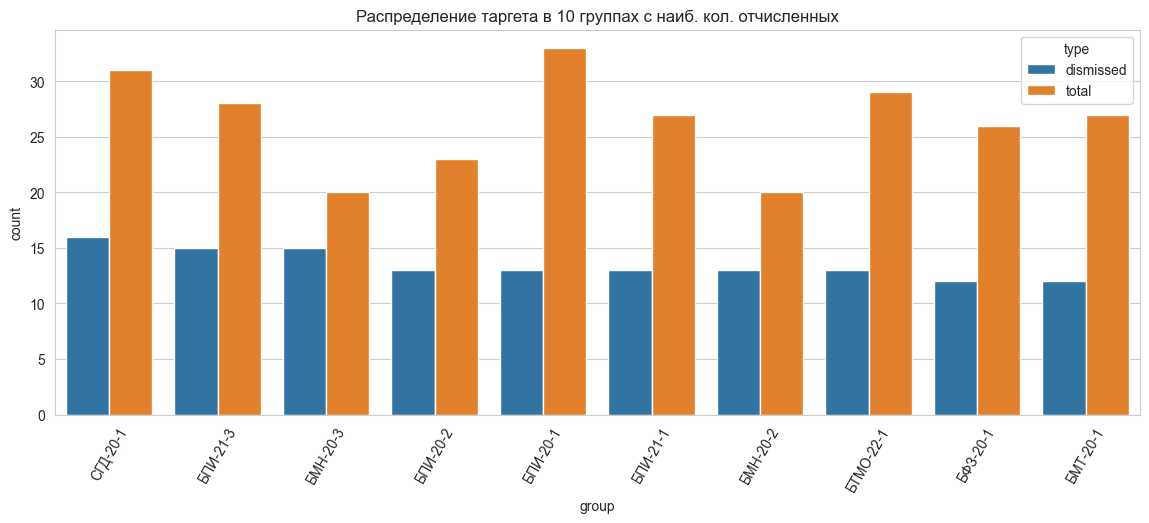

In [505]:
fig = plt.figure(figsize=(14, 5))

sns.barplot(data=groupped_by_group_melted, x="group", y="count", hue="type")

plt.title("Распределение таргета в 10 группах с наиб. кол. отчисленных")
plt.xticks(rotation=60)

plt.show()

## Speciality

## Subject

##